<a href="https://colab.research.google.com/github/jennychen0223/Automated_Optical_Inspection-AOI/blob/main/Aidea_AOI_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers, regularizers, metrics, regularizers, models, layers, utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import ntpath
from keras.applications.vgg16 import VGG16
from PIL import Image 
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp "/content/drive/My Drive/aoi/train.csv" /content/
! cp "/content/drive/My Drive/aoi/test.csv" /content/

In [ ]:
! unzip /content/drive/MyDrive/train_images.zip > data_unzip.log

replace train_images/train/4/train_02323.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_path = '/content/train_images/train/'
valid_path = '/content/train_images/valid/'
test_path = '/content/train_images/test/'


In [ ]:
train_0 = glob("/content/train_images/train/0/*.png") 
train_1 = glob("/content/train_images/train/1/*.png") 
train_2 = glob("/content/train_images/train/2/*.png") 
train_3 = glob("/content/train_images/train/3/*.png") 
train_4 = glob("/content/train_images/train/4/*.png")
train_5 = glob("/content/train_images/train/5/*.png") 


test_0 = glob("/content/train_images/test/0/*.png") 
test_1 = glob("/content/train_images/test/1/*.png")
test_2 = glob("/content/train_images/test/2/*.png") 
test_3 = glob("/content/train_images/test/3/*.png")
test_4 = glob("/content/train_images/test/4/*.png") 
test_5 = glob("/content/train_images/test/5/*.png") 

valid_0 = glob("/content/train_images/valid/0/*.png") 
valid_1 = glob("/content/train_images/valid/1/*.png")
valid_2 = glob("/content/train_images/valid/2/*.png")
valid_3 = glob("/content/train_images/valid/3/*.png")
valid_4 = glob("/content/train_images/valid/4/*.png") 
valid_5 = glob("/content/train_images/valid/5/*.png") 

print("train_0 : ", len(train_0))
print("train_1 : ", len(train_1))
print("train_2 : ", len(train_2))
print("train_3 : ", len(train_3))
print("train_4 : ", len(train_4))
print("train_5 : ", len(train_5))
print()

print("test_0 : ", len(test_0))
print("test_1 : ", len(test_1))
print("test_2 : ", len(test_2))
print("test_3 : ", len(test_3))
print("test_4 : ", len(test_4))
print("test_5 : ", len(test_5))
print()

print("valid_0 : ", len(valid_0))
print("valid_1 : ", len(valid_1))
print("valid_2 : ", len(valid_2))
print("valid_3 : ", len(valid_3))
print("valid_4 : ", len(valid_4))
print("valid_5 : ", len(valid_5))

train_0 :  492
train_1 :  338
train_2 :  73
train_3 :  254
train_4 :  168
train_5 :  444

test_0 :  86
test_1 :  84
test_2 :  10
test_3 :  68
test_4 :  40
test_5 :  92

valid_0 :  96
valid_1 :  70
valid_2 :  17
valid_3 :  56
valid_4 :  32
valid_5 :  108


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from time import gmtime, strftime
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255, #影象張量的數字縮放
      rotation_range=40, # 角度值，0~180，影象旋轉
      width_shift_range=0.2, # 水平平移，相對總寬度的比例
      height_shift_range=0.2, # 垂直平移，相對總高度的比例
      shear_range=0.2, # 隨機錯切換角度
      zoom_range=0.2, # 隨機縮放範圍
      horizontal_flip=True, # 一半影象水平翻轉
      fill_mode='nearest') # 填充新建立畫素的方法

In [ ]:
train_generator = train_datagen.flow_from_directory(
      train_path, # 目標目錄
      target_size=(224, 224),
      classes=['0', '1', '2', '3', '4', '5'],
      batch_size=32,
      class_mode='categorical')

Found 1769 images belonging to 6 classes.


In [ ]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 379 images belonging to 6 classes.


In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input

densenet  = DenseNet121(weights = 'imagenet', 
                        include_top = False, 
                        input_shape=(224,224,3))
model = models.Sequential()
model.add(densenet)

model.add(Conv2D(32, (1, 1),activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(64))

model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 32)          32800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 124s 1s/step - loss: 1.8128 - acc: 0.3093 - val_loss: 1.7912 - val_acc: 0.2406
Epoch 2/50
50/50 [==============================] - 42s 829ms/step - loss: 1.1940 - acc: 0.5390 - val_loss: 1.5083 - val_acc: 0.3469
Epoch 3/50
50/50 [==============================] - 42s 829ms/step - loss: 0.9701 - acc: 0.6315 - val_loss: 1.3689 - val_acc: 0.4000
Epoch 4/50
50/50 [==============================] - 42s 829ms/step - loss: 0.7870 - acc: 0.7162 - val_loss: 1.3215 - val_acc: 0.4688
Epoch 5/50
50/50 [==============================] - 42s 828ms/step - loss: 0.5952 - acc: 0.7869 - val_loss: 1.0771 - val_acc: 0.5437
Epoch 6/50
50/50 [==============================] - 42s 827ms/step - loss: 0.5164 - acc: 0.8208 - val_loss: 0.9069 - val_acc: 0.6250
Epoch 7/50
50/50 [==============================] - 42s 832ms/step - loss: 0.3935 - acc: 0.8643 - val_loss: 0.7088 - val_acc: 0.7250
Epoch 8/50
50/50 [==============================] - 42s 829ms/step - lo

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 380 images belonging to 6 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(
	test_generator, 
	steps=test_generator.samples//test_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('test acc:', test_acc)


test acc: 0.9829545617103577


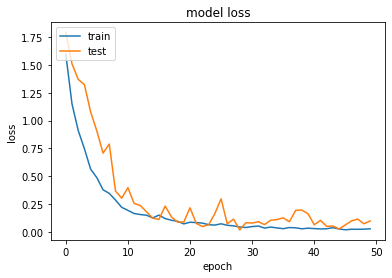

In [ ]:
# plot model loss & save
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

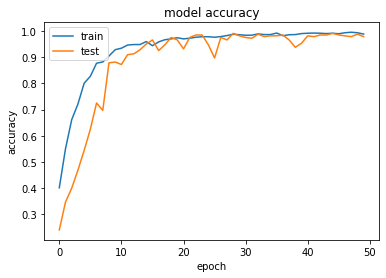

In [ ]:
# plot model accuracy & save
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

進行預測

In [ ]:
! unzip /content/drive/MyDrive/aoi/test_images.zip > data_unzip.log

In [ ]:
test_path2 = 'test_images/'


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator2 = test_datagen.flow_from_directory(
        '.',
        target_size=(224, 224),
        class_mode='categorical',
        classes=['test_images'],
	      batch_size=1,
	      shuffle=False)

Found 10142 images belonging to 1 classes.


In [ ]:
steps2=test_generator2.samples//test_generator2.batch_size
print(steps2)

10142


In [ ]:
predict = model.predict_generator(
    test_generator2,
    steps=test_generator2.samples//test_generator2.batch_size)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import csv
i =0 
#f1 = open ("inFile","r") # open input file for reading
with open('output.csv', 'w') as csvfile:
	writer = csv.writer(csvfile)
	writer.writerow(['ID', 'Label'])
	#print(len(predict))
	while i < len(predict):
		#image, label = test_generator2._get_batches_of_transformed_samples(np.array([i]))
		image_name = test_generator2.filenames[i]
		result=np.where(predict[i] == np.amax(predict[i]))[0][0]
		writer.writerow([image_name, result])
		i=i+1
	print(i)

10142


In [ ]:
result = pd.read_csv('output.csv')
result["ID"] = result["ID"].str.replace("test_images/t","t")


In [ ]:
import pandas as pd
result.to_csv('Result_DenseNet121.csv', index=False )